In [414]:
import sys
sys.path.append(r'../')
import numpy as np
from scipy import signal
import mat73
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.animation as animation
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Loss
from tensorflow.keras.activations import sigmoid as sig
from tensorflow.keras.activations import relu
from keras.utils.np_utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
%reload_ext autoreload
%autoreload 2
from functions import *

(-5.0, 5.0, -5.0, 5.0)

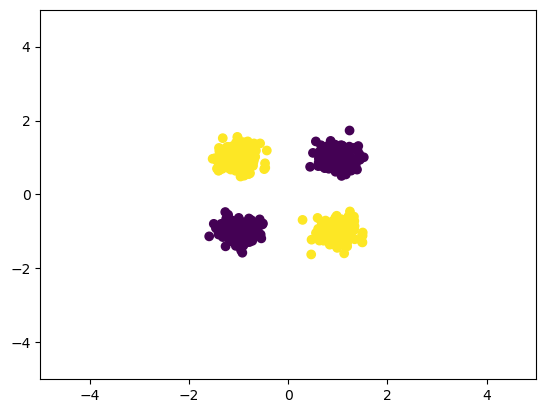

In [447]:
xgen = lambda x1,x2 : np.c_[np.random.normal(x1, 0.2, size=200), np.random.normal(x2, 0.2, size=200)]
C1 = np.r_[xgen(-1,1), xgen(1,-1)]
C2 = np.r_[xgen(1,1), xgen(-1,-1)]
C = np.r_[C1,C2]
labels = np.r_[np.ones(C1.shape[0]), np.zeros(C2.shape[0])].astype(int)
plt.scatter(C[:,0], C[:,1], c=labels)
plt.axis([-5,5,-5,5])

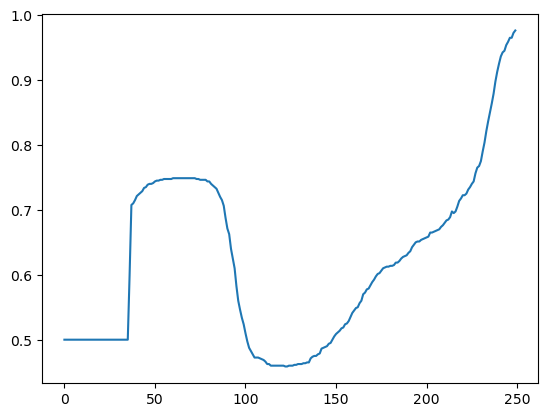

In [449]:
%matplotlib inline
b_predictor = tf.keras.Sequential([
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

b_predictor.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = b_predictor.fit(C,
                      labels,
                      epochs=250,
                      batch_size=200,
                          verbose=0
                      )
# Summarize history for accuracy
plt.plot(history.history['accuracy'])

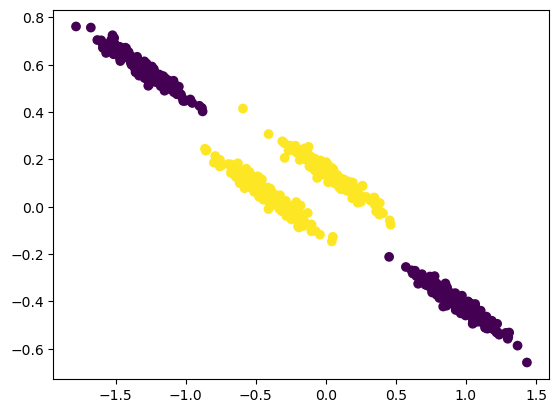

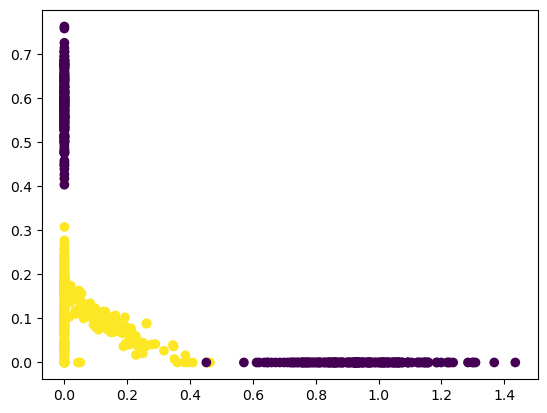

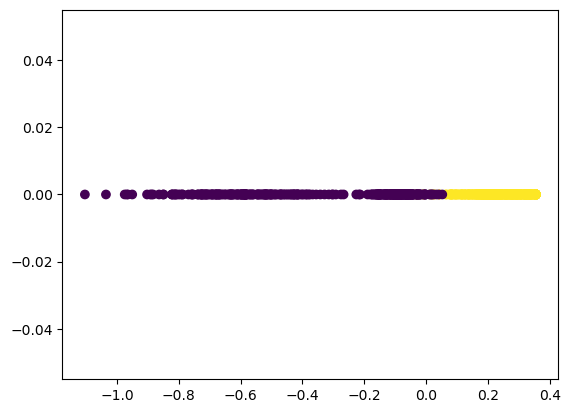

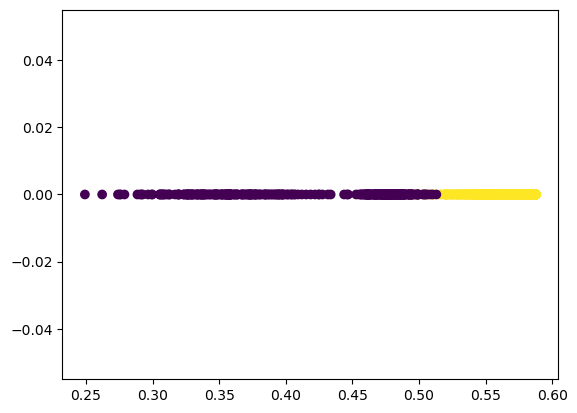

In [450]:
w1 = b_predictor.weights[0].numpy()
b1 = b_predictor.weights[1].numpy()
w2 = b_predictor.weights[2].numpy()
b2 = b_predictor.weights[3].numpy()
pass1 = (C @ w1 + b1)
pass1act = relu(pass1)
pass2 = (pass1act @ w2 + b2)
pass2act = sig(pass2)
plt.scatter(pass1[:,0],pass1[:,1], c = labels)
plt.figure()
plt.scatter(pass1act[:,0],pass1act[:,1], c = labels)
plt.figure()
plt.scatter(pass2,np.zeros_like(pass2), c = labels)
plt.figure()
plt.scatter(pass2act,np.zeros_like(pass2act), c = labels)

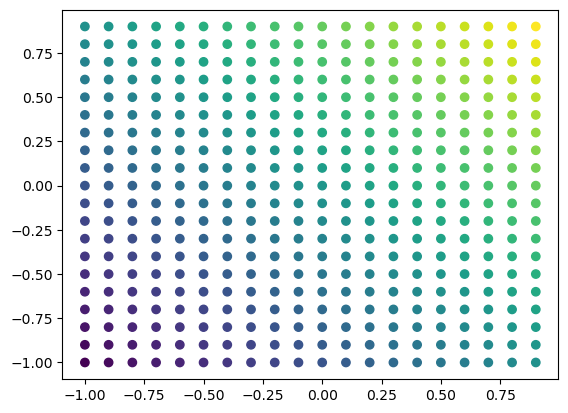

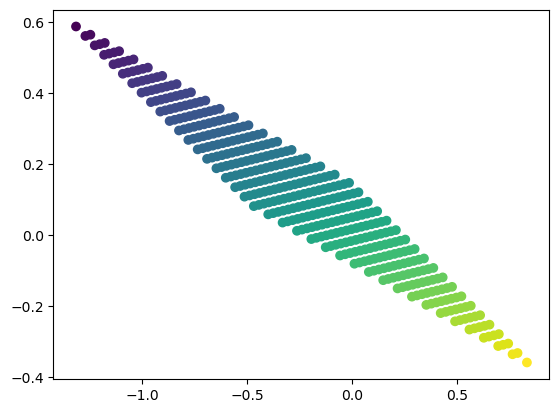

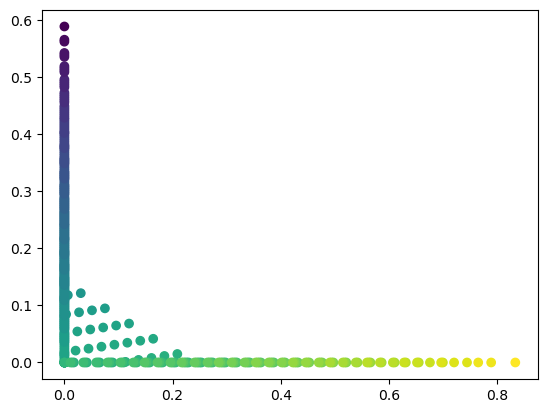

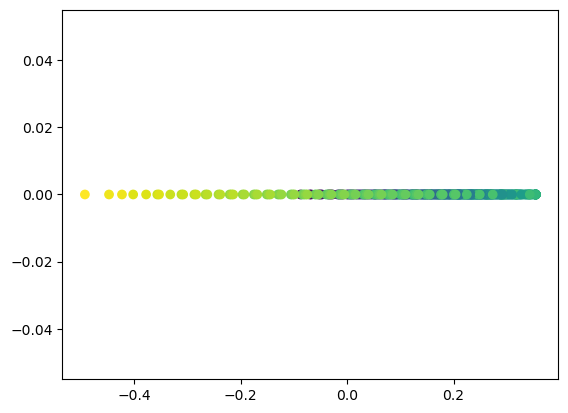

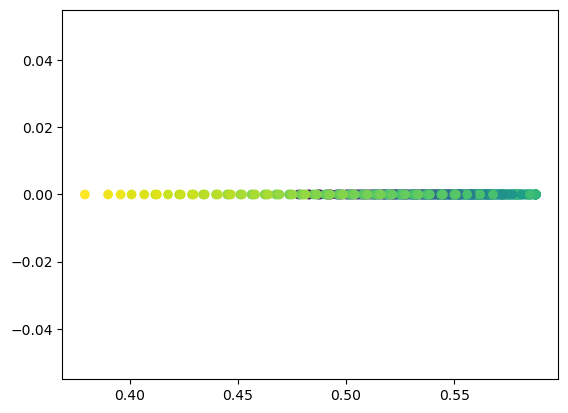

In [451]:
x,y= np.meshgrid(np.arange(-1,1,0.1),np.arange(-1,1,0.1))
x,y = x.flatten(), y.flatten()
plt.scatter(x,y, c = x+y)
w1 = b_predictor.weights[0].numpy()
b1 = b_predictor.weights[1].numpy()
w2 = b_predictor.weights[2].numpy()
b2 = b_predictor.weights[3].numpy()
inp = np.c_[x,y]
pass1 = (inp @ w1 + b1)
pass1act = relu(pass1)
pass2 = (pass1act @ w2 + b2)
pass2act = sig(pass2)
plt.figure()

plt.scatter(pass1[:,0],pass1[:,1], c = x+y)
plt.figure()
plt.scatter(pass1act[:,0],pass1act[:,1], c = x+y)
plt.figure()
plt.scatter(pass2,np.zeros_like(pass2), c = x+y)
plt.figure()
plt.scatter(pass2act,np.zeros_like(pass2act), c = x+y)

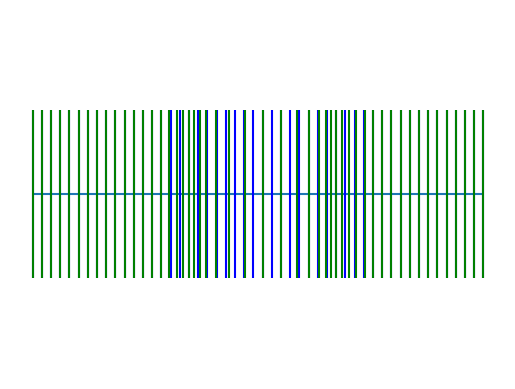

In [452]:
x = np.arange(-5,5,0.2)
f_x = x*(1+np.exp(-x**2))
plt.hlines(1,x.min(),x.max())  # Draw a horizontal line
plt.eventplot(x, orientation='horizontal', colors='b')
plt.eventplot(f_x, orientation='horizontal', colors='g')
plt.axis('off')
plt.show()

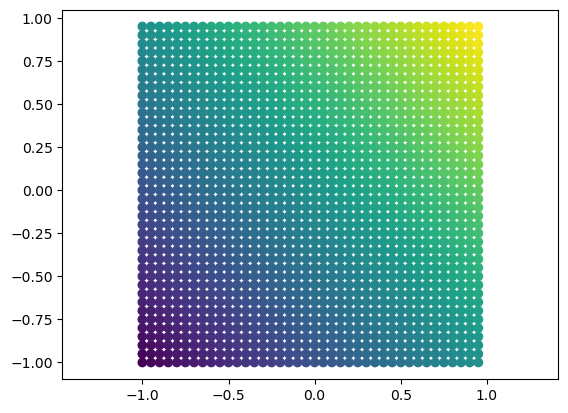

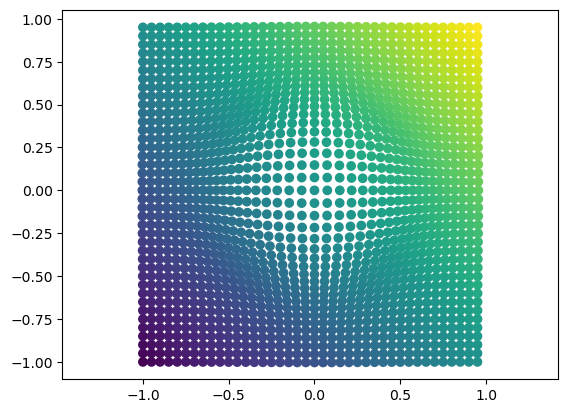

In [498]:
x,y= np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,1,0.05))
x,y = x.flatten(), y.flatten()
plt.scatter(x,y, c = x+y)
plt.axis('equal')
plt.figure()
plt.axis('equal')
x1, y1 = x*(1+0.5*np.exp(-5*(x**2+y**2))) ,y*(1+0.5*np.exp(-5*(x**2+y**2)))
plt.scatter(x1, y1, c = x+y)

In [626]:
xgen = lambda x1,x2 : np.c_[np.random.normal(x1, 0.4, size=200), np.random.normal(x2, 0.5, size=200)]
C1 = np.r_[xgen(-1,1)]
C2 = np.r_[xgen(1,1), xgen(1,-1), xgen(-1,-1)]
C = np.r_[C1,C2]
labels = np.r_[np.ones(C1.shape[0]), np.zeros(C2.shape[0])].astype(int)


x1 = np.vstack([np.random.uniform(-3,3, size=300), np.random.uniform(-3,-2, size=300)]).T
x2 = np.vstack([np.random.uniform(-3,-2, size=200), np.random.uniform(-2,2, size=200)]).T
x3 = np.vstack([np.random.uniform(2,3, size=200), np.random.uniform(-2,2, size=200)]).T
x4 = np.vstack([np.random.uniform(-3,3, size=300), np.random.uniform(2,3, size=300)]).T
x5 = np.vstack([np.random.uniform(-1,1, size=200), np.random.uniform(-1,1, size=200)]).T
### Preparing data set for decision tree classifiers
C = np.r_[x2,x3,x4,x5]
labels = np.zeros(C.shape[0])
labels[-200:]=1

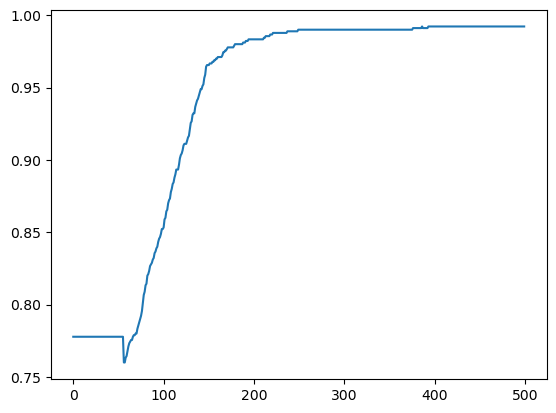

In [603]:
%matplotlib inline
b_predictor = tf.keras.Sequential([
    layers.Dense(2, activation='relu'),
    #layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

b_predictor.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = b_predictor.fit(C,
                      labels,
                      epochs=500,
                      batch_size=100,
                          verbose=0
                      )
# Summarize history for accuracy
plt.plot(history.history['accuracy'])

In [617]:
history = b_predictor.fit(C,
                      labels,
                      epochs=500,
                      batch_size=100,
                          verbose=0
                      )

In [618]:
b_predictor.evaluate(C, labels)

29/29 [==============================] - 0s 588us/step - loss: 0.0014 - accuracy: 1.0000


[0.0013565124245360494, 1.0]

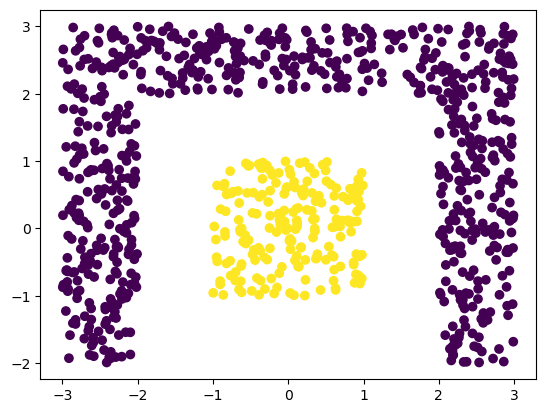

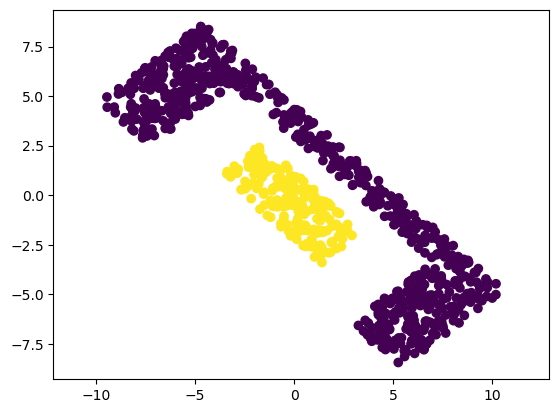

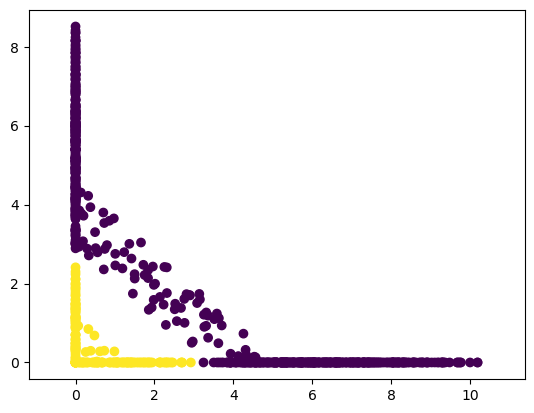

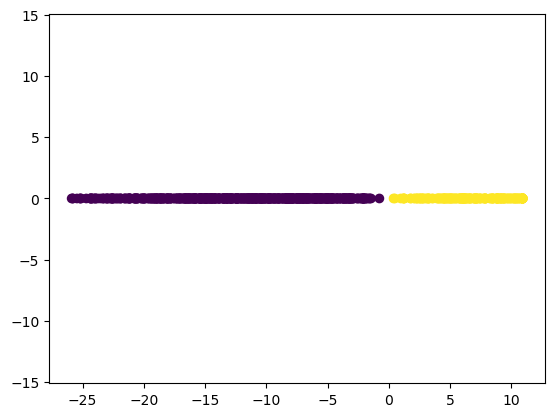

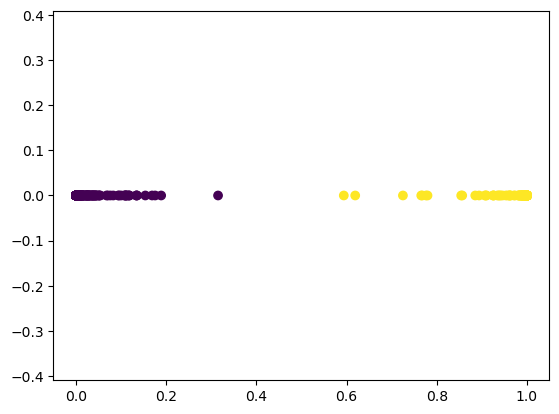

In [621]:
w1 = b_predictor.weights[0].numpy()
b1 = b_predictor.weights[1].numpy()
w2 = b_predictor.weights[2].numpy()
b2 = b_predictor.weights[3].numpy()
pass1 = (C @ w1 + b1)
pass1act = relu(pass1)
pass2 = (pass1act @ w2 + b2)
pass2act = sig(pass2)
plt.scatter(C[:,0], C[:,1], c=labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass1[:,0],pass1[:,1], c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass1act[:,0],pass1act[:,1], c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass2,np.zeros_like(pass2), c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass2act,np.zeros_like(pass2act), c = labels)

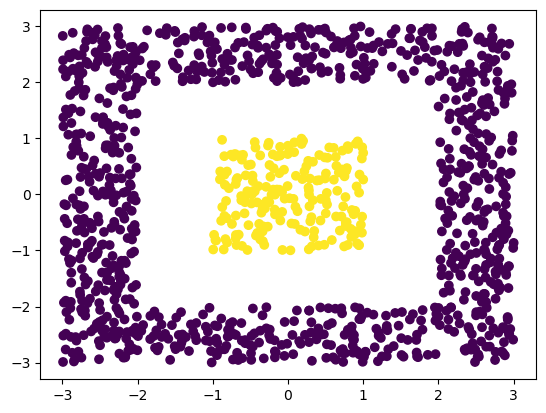

In [726]:
xgen = lambda x1,x2 : np.c_[np.random.normal(x1, 0.4, size=200), np.random.normal(x2, 0.5, size=200)]
C1 = np.r_[xgen(-1,1)]
C2 = np.r_[xgen(1,1), xgen(1,-1), xgen(-1,-1)]
C = np.r_[C1,C2]
labels = np.r_[np.ones(C1.shape[0]), np.zeros(C2.shape[0])].astype(int)


x1 = np.vstack([np.random.uniform(-3,3, size=300), np.random.uniform(-3,-2, size=300)]).T
x2 = np.vstack([np.random.uniform(-3,-2, size=200), np.random.uniform(-2,2, size=200)]).T
x3 = np.vstack([np.random.uniform(2,3, size=200), np.random.uniform(-2,2, size=200)]).T
x4 = np.vstack([np.random.uniform(-3,3, size=300), np.random.uniform(2,3, size=300)]).T
x5 = np.vstack([np.random.uniform(-1,1, size=200), np.random.uniform(-1,1, size=200)]).T
### Preparing data set for decision tree classifiers
C = np.r_[x1,x2,x3,x4,x5]
labels = np.zeros(C.shape[0])
labels[-200:]=1
plt.scatter(C[:,0],C[:,1], c=labels)

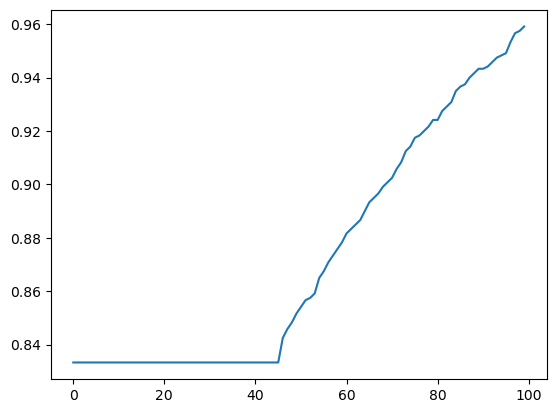

In [745]:
%matplotlib inline
b_predictor = tf.keras.Sequential([
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

b_predictor.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = b_predictor.fit(C,
                      labels,
                      epochs=100,
                      batch_size=100,
                          verbose=0
                      )
# Summarize history for accuracy
plt.plot(history.history['accuracy'])

In [752]:
history = b_predictor.fit(C,
                      labels,
                      epochs=500,
                      batch_size=100,
                          verbose=0
                      )

In [753]:
b_predictor.evaluate(C, labels)

38/38 [==============================] - 0s 567us/step - loss: 3.3249e-04 - accuracy: 1.0000


[0.0003324892313685268, 1.0]

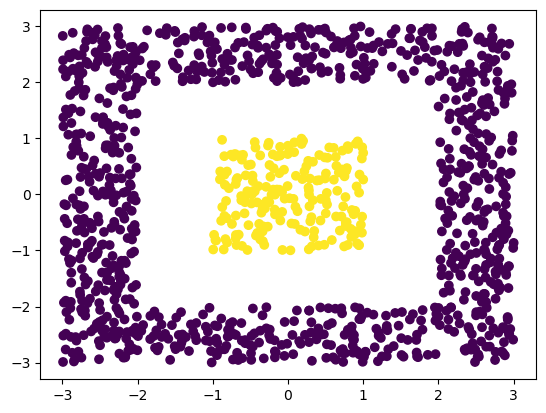

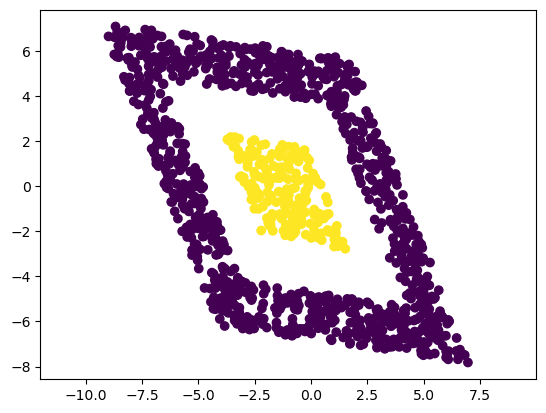

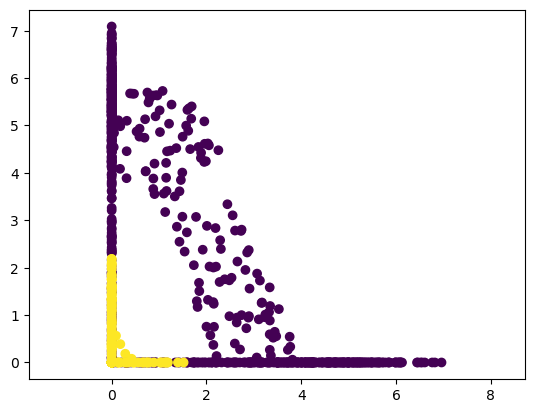

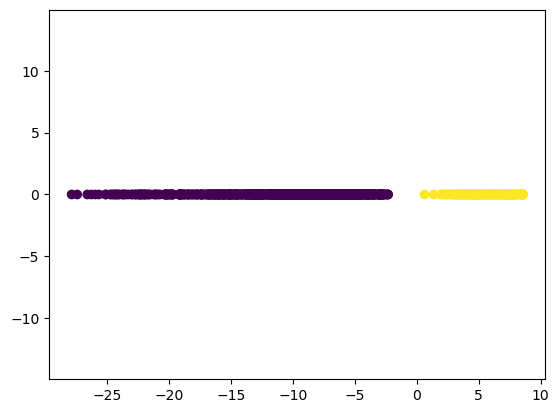

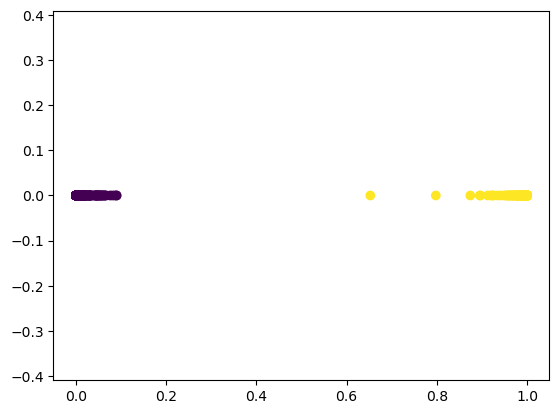

In [754]:
w1 = b_predictor.weights[0].numpy()
b1 = b_predictor.weights[1].numpy()
w2 = b_predictor.weights[2].numpy()
b2 = b_predictor.weights[3].numpy()
pass1 = (C @ w1 + b1)
pass1act = relu(pass1)
pass2 = (pass1act @ w2 + b2)
pass2act = sig(pass2)
plt.scatter(C[:,0], C[:,1], c=labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass1[:,0],pass1[:,1], c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass1act[:,0],pass1act[:,1], c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass2,np.zeros_like(pass2), c = labels)
plt.figure()
plt.axis('equal')
plt.scatter(pass2act,np.zeros_like(pass2act), c = labels)

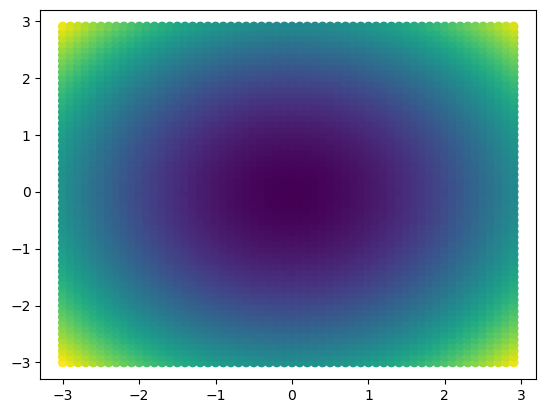

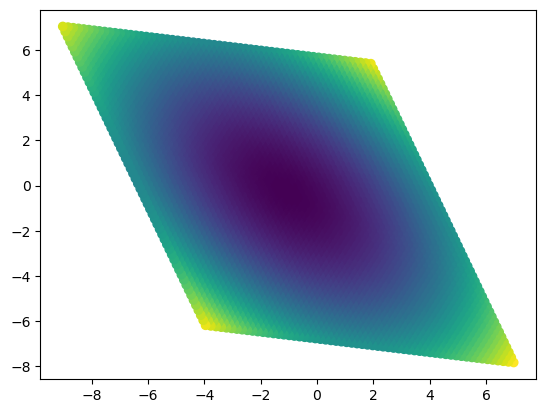

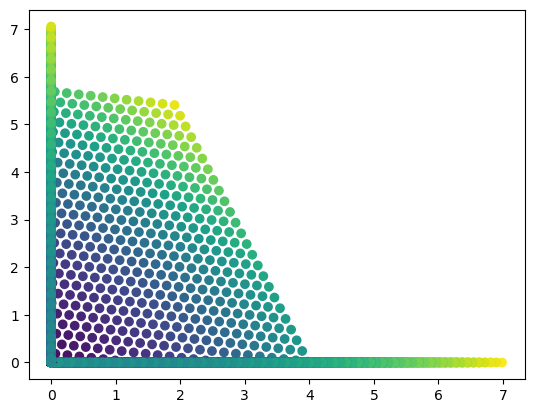

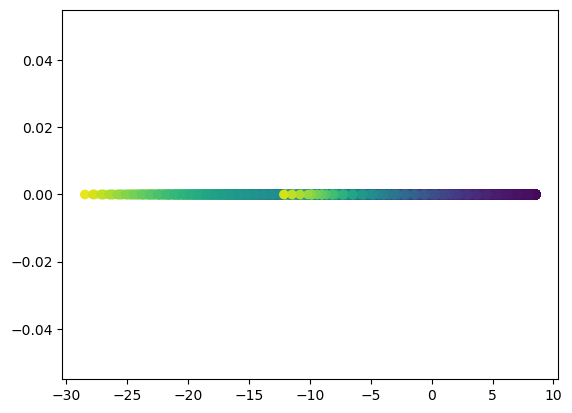

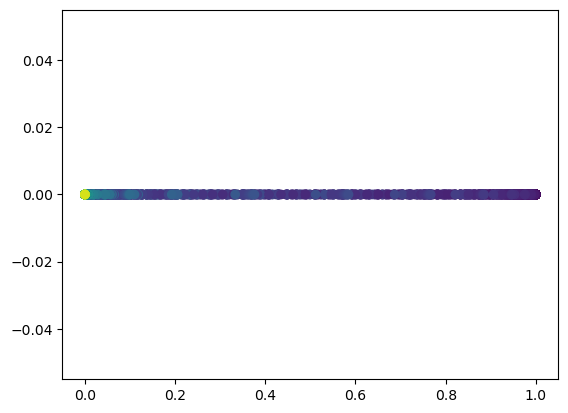

In [762]:
%matplotlib inline
x,y= np.meshgrid(np.arange(-3,3,0.1),np.arange(-3,3,0.1))
x,y = x.flatten(), y.flatten()
plt.scatter(x,y, c =  x**2+y**2)
w1 = b_predictor.weights[0].numpy()
b1 = b_predictor.weights[1].numpy()
w2 = b_predictor.weights[2].numpy()
b2 = b_predictor.weights[3].numpy()
inp = np.c_[x,y]
pass1 = (inp @ w1 + b1)
pass1act = relu(pass1)
pass2 = (pass1act @ w2 + b2)
pass2act = sig(pass2)
plt.figure()



plt.scatter(pass1[:,0],pass1[:,1], c = x**2+y**2)
plt.figure()
plt.scatter(pass1act[:,0],pass1act[:,1], c =  x**2+y**2)
plt.figure()
plt.scatter(pass2,np.zeros_like(pass2), c =  x**2+y**2)
plt.figure()
plt.scatter(pass2act,np.zeros_like(pass2act), c = x**2+y**2)

<IPython.core.display.Javascript object>


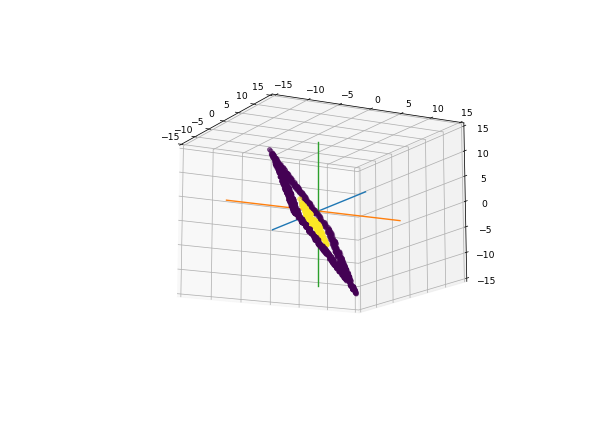

(-15.0, 15.0)

In [755]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pass1[:,0],pass1[:,1],pass1[:,2],c = labels)
ax.plot(np.arange(-15,15), np.zeros(30))
ax.plot(np.zeros(30), np.arange(-15,15))
ax.plot(np.zeros(30), np.zeros(30), np.arange(-15,15))
ax.axes.set_xlim3d(left=-15, right=15) 
ax.axes.set_ylim3d(bottom=-15, top=15) 
ax.axes.set_zlim3d(bottom=-15, top=15) 


### Implementing local magnification function on neural net

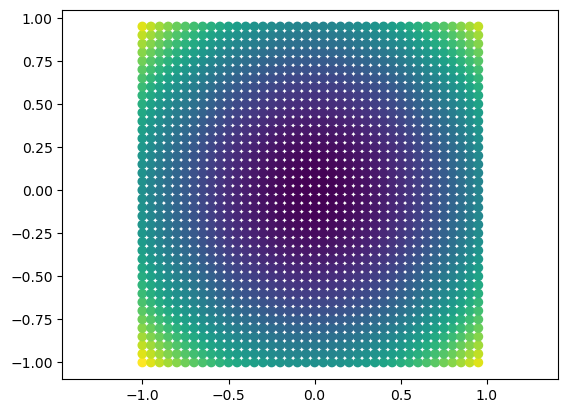

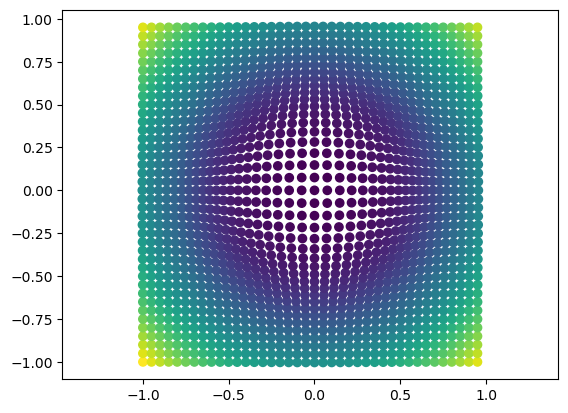

In [918]:
x,y= np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,1,0.05))
X_in = np.c_[x.flatten(), y.flatten()]
plt.scatter(X_in[:,0],X_in[:,1], c = np.linalg.norm(X_in,axis=1)**2)
plt.axis('equal')
plt.figure()
plt.axis('equal')
X_out = X_in * (1 + 0.5*np.exp(-5*np.linalg.norm(X_in,axis=1)**2))[:,np.newaxis]
plt.scatter(X_out[:,0], X_out[:,1], c = np.linalg.norm(X_in,axis=1)**2)

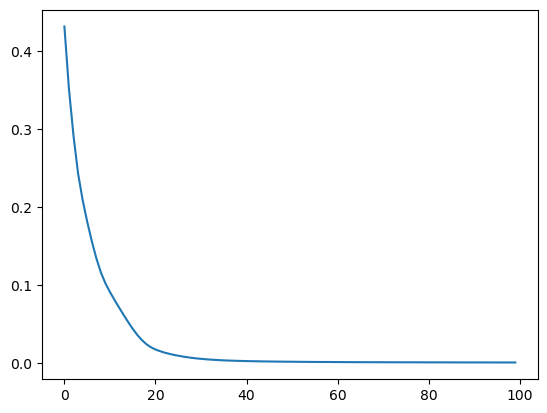

In [939]:
%matplotlib inline
nn = tf.keras.Sequential([
    layers.Dense(5, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='linear'),
])
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

nn.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

history = nn.fit(X_in,
                      X_out,
                      epochs=100,
                      batch_size=100,
                          verbose=0
                      )
# Summarize history for accuracy
plt.plot(history.history['mse'])


In [944]:
history = nn.fit(X_in, X_out,
                      epochs=5000,
                      batch_size=800,
                          verbose=0
                      )
nn.evaluate(X_in, X_out)

50/50 [==============================] - 0s 594us/step - loss: 4.9288e-05 - mse: 4.9288e-05


[4.928805719828233e-05, 4.928805719828233e-05]

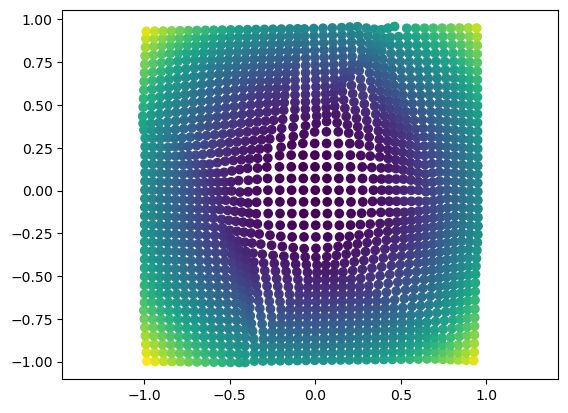

In [943]:
%matplotlib inline
X_pred = nn(X_in).numpy()
plt.figure()
plt.axis('equal')
plt.scatter(X_pred[:,0],X_pred[:,1], c =np.linalg.norm(X_in,axis=1)**2)